In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import gaussian_kde

In [39]:
df = pd.read_csv("data/ds_salaries.csv")
df

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M
...,...,...,...,...,...,...,...,...,...,...,...
3750,2020,SE,FT,Data Scientist,412000,USD,412000,US,100,US,L
3751,2021,MI,FT,Principal Data Scientist,151000,USD,151000,US,100,US,L
3752,2020,EN,FT,Data Scientist,105000,USD,105000,US,100,US,S
3753,2020,EN,CT,Business Data Analyst,100000,USD,100000,US,100,US,L


In [3]:
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


In [4]:
df.shape

(3755, 11)

In [5]:
df.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')

In [6]:
df.dtypes

work_year              int64
experience_level      object
employment_type       object
job_title             object
salary                 int64
salary_currency       object
salary_in_usd          int64
employee_residence    object
remote_ratio           int64
company_location      object
company_size          object
dtype: object

In [7]:
df.isnull().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [8]:
df.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,3755.000000,3.755000e+03,3755.000000,3755.000000
mean,2022.373635,1.906956e+05,137570.389880,46.271638
std,0.691448,6.716765e+05,63055.625278,48.589050
min,2020.000000,6.000000e+03,5132.000000,0.000000
25%,2022.000000,1.000000e+05,95000.000000,0.000000
50%,2022.000000,1.380000e+05,135000.000000,0.000000
75%,2023.000000,1.800000e+05,175000.000000,100.000000
max,2023.000000,3.040000e+07,450000.000000,100.000000


In [9]:
df.select_dtypes(include='object').nunique()

experience_level       4
employment_type        4
job_title             93
salary_currency       20
employee_residence    78
company_location      72
company_size           3
dtype: int64

In [10]:
country_map = {
    "IL": "Israel",
    "PR": "Puerto Rico",
    "RU": "Russia",
    "NZ": "New Zealand",
    "IE": "Ireland",
    "SE": "Sweden",
    "US": "United States",
    "UK": "United Kingdom",
    "CA": "Canada",
    "DE": "Germany",
    "IN": "India",
    "FR": "France",
    "AU": "Australia",
    "CN": "China",
    "BR": "Brazil",
    "ES": "Spain",
    "PK": "Pakistan",
    "PL": "Poland",
    "MX": "Mexico",
    "JP": "Japan",
    "SG": "Singapore",
    "CH": "Switzerland"
}


In [11]:
df['employee_residence'] = df['employee_residence'].replace(country_map)

In [12]:
df['company_location'] = df['company_location'].replace(country_map)

In [13]:
df

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,Spain,100,Spain,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,United States,100,United States,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,United States,100,United States,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,Canada,100,Canada,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,Canada,100,Canada,M
...,...,...,...,...,...,...,...,...,...,...,...
3750,2020,SE,FT,Data Scientist,412000,USD,412000,United States,100,United States,L
3751,2021,MI,FT,Principal Data Scientist,151000,USD,151000,United States,100,United States,L
3752,2020,EN,FT,Data Scientist,105000,USD,105000,United States,100,United States,S
3753,2020,EN,CT,Business Data Analyst,100000,USD,100000,United States,100,United States,L


In [14]:
df['experience_level'] = df['experience_level'].replace({
    "EN": "Entry Level",
    "MI": "Mid Level",
    "SE": "Senior Level",
    "EX": "Executive"
})

In [15]:
df['employment_type'] = df['employment_type'].replace({
    "FT": "Full Time",
    "PT": "Part Time",
    "CT": "Contract",
    "FL": "Freelance"
})

In [16]:
df['company_size'] = df['company_size'].replace({
    "S": "Small",
    "M": "Medium",
    "L": "Large"
})

In [17]:
df

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,Senior Level,Full Time,Principal Data Scientist,80000,EUR,85847,Spain,100,Spain,Large
1,2023,Mid Level,Contract,ML Engineer,30000,USD,30000,United States,100,United States,Small
2,2023,Mid Level,Contract,ML Engineer,25500,USD,25500,United States,100,United States,Small
3,2023,Senior Level,Full Time,Data Scientist,175000,USD,175000,Canada,100,Canada,Medium
4,2023,Senior Level,Full Time,Data Scientist,120000,USD,120000,Canada,100,Canada,Medium
...,...,...,...,...,...,...,...,...,...,...,...
3750,2020,Senior Level,Full Time,Data Scientist,412000,USD,412000,United States,100,United States,Large
3751,2021,Mid Level,Full Time,Principal Data Scientist,151000,USD,151000,United States,100,United States,Large
3752,2020,Entry Level,Full Time,Data Scientist,105000,USD,105000,United States,100,United States,Small
3753,2020,Entry Level,Contract,Business Data Analyst,100000,USD,100000,United States,100,United States,Large


In [18]:
df['remote_ratio'] = df['remote_ratio'].replace({
    0: "On-site",
    50: "Hybrid",
    100: "Fully Remote"
})

In [19]:
df

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,Senior Level,Full Time,Principal Data Scientist,80000,EUR,85847,Spain,Fully Remote,Spain,Large
1,2023,Mid Level,Contract,ML Engineer,30000,USD,30000,United States,Fully Remote,United States,Small
2,2023,Mid Level,Contract,ML Engineer,25500,USD,25500,United States,Fully Remote,United States,Small
3,2023,Senior Level,Full Time,Data Scientist,175000,USD,175000,Canada,Fully Remote,Canada,Medium
4,2023,Senior Level,Full Time,Data Scientist,120000,USD,120000,Canada,Fully Remote,Canada,Medium
...,...,...,...,...,...,...,...,...,...,...,...
3750,2020,Senior Level,Full Time,Data Scientist,412000,USD,412000,United States,Fully Remote,United States,Large
3751,2021,Mid Level,Full Time,Principal Data Scientist,151000,USD,151000,United States,Fully Remote,United States,Large
3752,2020,Entry Level,Full Time,Data Scientist,105000,USD,105000,United States,Fully Remote,United States,Small
3753,2020,Entry Level,Contract,Business Data Analyst,100000,USD,100000,United States,Fully Remote,United States,Large


In [20]:
df.rename(columns={'remote_ratio': 'work_mode'}, inplace=True)

In [21]:
df.rename(columns={'salary': 'salary_original'}, inplace=True)

In [22]:
df.rename(columns={'job_title': 'designation'}, inplace=True)

In [23]:
df

,work_year,experience_level,employment_type,designation,salary_original,salary_currency,salary_in_usd,employee_residence,work_mode,company_location,company_size
0,2023,Senior Level,Full Time,Principal Data Scientist,80000,EUR,85847,Spain,Fully Remote,Spain,Large
1,2023,Mid Level,Contract,ML Engineer,30000,USD,30000,United States,Fully Remote,United States,Small
2,2023,Mid Level,Contract,ML Engineer,25500,USD,25500,United States,Fully Remote,United States,Small
3,2023,Senior Level,Full Time,Data Scientist,175000,USD,175000,Canada,Fully Remote,Canada,Medium
4,2023,Senior Level,Full Time,Data Scientist,120000,USD,120000,Canada,Fully Remote,Canada,Medium
...,...,...,...,...,...,...,...,...,...,...,...
3750,2020,Senior Level,Full Time,Data Scientist,412000,USD,412000,United States,Fully Remote,United States,Large
3751,2021,Mid Level,Full Time,Principal Data Scientist,151000,USD,151000,United States,Fully Remote,United States,Large
3752,2020,Entry Level,Full Time,Data Scientist,105000,USD,105000,United States,Fully Remote,United States,Small
3753,2020,Entry Level,Contract,Business Data Analyst,100000,USD,100000,United States,Fully Remote,United States,Large


In [24]:
df['salary_original'] = df['salary_original'].astype(str).str.replace(r'[^0-9.]', '', regex=True)
df['salary_original'] = pd.to_numeric(df['salary_original'], errors='coerce')

In [25]:
df['salary_in_usd'] = df['salary_in_usd'].astype(str).str.replace(r'[^0-9.]', '', regex=True)
df['salary_in_usd'] = pd.to_numeric(df['salary_in_usd'], errors='coerce')

In [26]:
numeric_cols = ['salary_original', 'salary_in_usd']
numeric_cols

['salary_original', 'salary_in_usd']

In [27]:
for col in df.columns:
    if col not in numeric_cols:
        df[col] = df[col].astype('category')

# Data Visuallization

In [28]:
import matplotlib.pyplot as plt

# Clean professional theme
plt.style.use('ggplot')

# Custom color palette
colors = ['#4C72B0', '#55A868', '#C44E52', '#8172B2', '#CCB974', '#64B5CD']


## Univariate Chart

## 1) Salary Distribution Histogram

In [29]:
df['salary_in_usd_num'] = df['salary_in_usd'].astype(str).str.replace(r'[^0-9.]','', regex=True).astype(float)

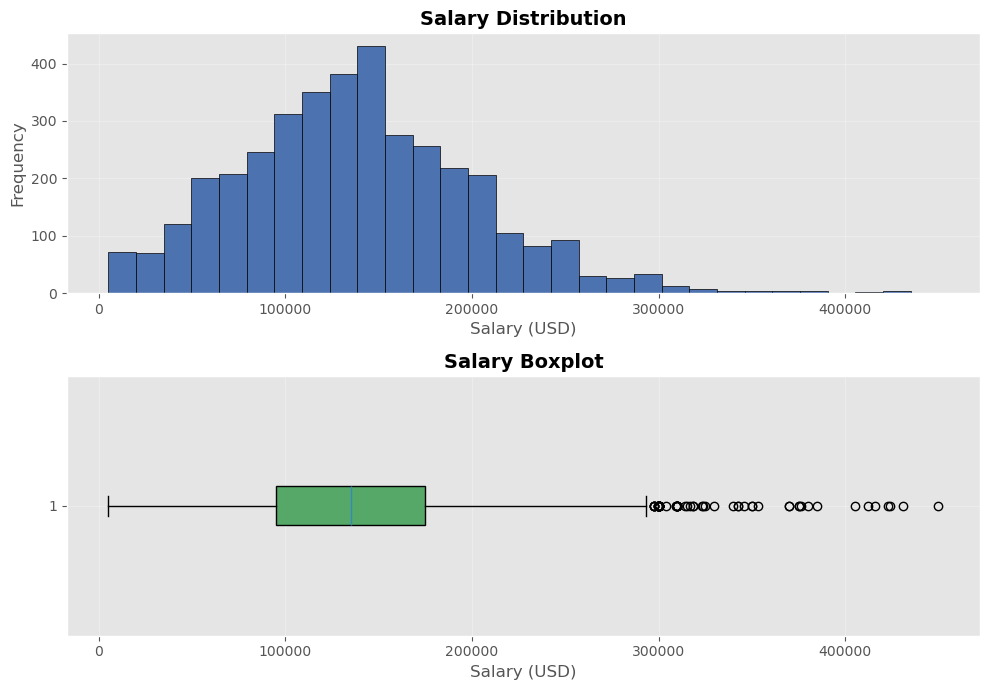

In [30]:
# SUBPLOT: Salary Histogram + Salary Boxplot

plt.figure(figsize=(10,7))

# ---------- SUBPLOT 1: HISTOGRAM ----------
plt.subplot(2, 1, 1)   # (rows=2, columns=1, plot=1)
plt.hist(df['salary_in_usd_num'], bins=30, color=colors[0], edgecolor='black')
plt.title("Salary Distribution", fontsize=14, fontweight='bold')
plt.xlabel("Salary (USD)")
plt.ylabel("Frequency")
plt.grid(alpha=0.3)

# ---------- SUBPLOT 2: BOXPLOT ----------
plt.subplot(2, 1, 2)   # (rows=2, columns=1, plot=2)
plt.boxplot(df['salary_in_usd_num'], vert=False, patch_artist=True,
            boxprops=dict(facecolor=colors[1], edgecolor='black'))
plt.title("Salary Boxplot", fontsize=14, fontweight='bold')
plt.xlabel("Salary (USD)")
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()

## OBSERVATION 
- #### Histogram shows salary is right-skewed.
- #### Most salaries fall in the low-to-middle range.
- #### Boxplot shows many high-value outliers.
- #### Salary spread is high, indicating large pay variation

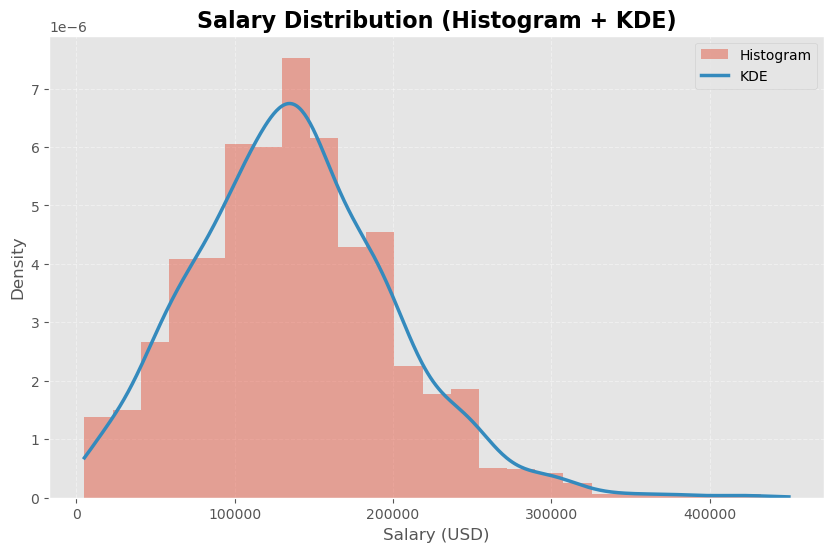

In [41]:
x = pd.to_numeric(df['salary_in_usd'], errors='coerce')

x_valid = x[~x.isna()]

# KDE calculation
kde = gaussian_kde(x_valid, bw_method=0.25)

# KDE X-axis range
x_vals = np.linspace(x_valid.min(), x_valid.max(), 500)
kde_vals = kde(x_vals)

# Plot
plt.figure(figsize=(10,6))

# Histogram
plt.hist(
    x_valid,
    bins=25,
    density=True,
    alpha=0.45,
    label="Histogram"
)

# KDE Line
plt.plot(
    x_vals,
    kde_vals,
    linewidth=2.5,
    label="KDE"
)

# Labels & Title
plt.title("Salary Distribution (Histogram + KDE)", fontsize=16, fontweight='bold')
plt.xlabel("Salary (USD)")
plt.ylabel("Density")

# Grid & Legend
plt.grid(True, linestyle="--", alpha=0.4)
plt.legend()

plt.show()


## 2) Experience Level Distribution

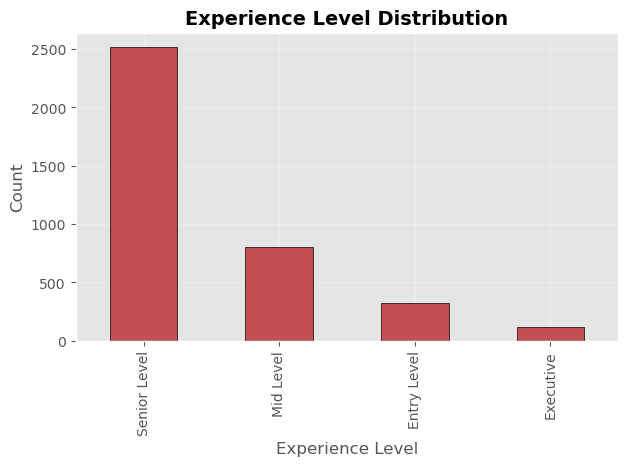

In [91]:
plt.figure(figsize=(7,4))
df['experience_level'].value_counts().plot(kind='bar', color=colors[2], edgecolor='black')
plt.title("Experience Level Distribution", fontsize=14, fontweight='bold')
plt.xlabel("Experience Level")
plt.ylabel("Count")
plt.grid(alpha=0.3)
plt.show()

### Observation

- #### Majority of employees are Mid Level.

- #### Senior Level is the second highest group.

- #### Executive Level professionals are very few → leadership roles are rare in dataset.

## 3) Employment Type Distribution

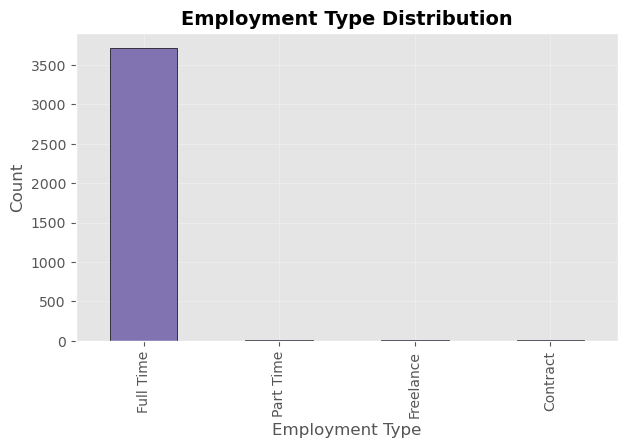

In [92]:
plt.figure(figsize=(7,4))
df['employment_type'].value_counts().plot(kind='bar', color=colors[3], edgecolor='black')
plt.title("Employment Type Distribution", fontsize=14, fontweight='bold')
plt.xlabel("Employment Type")
plt.ylabel("Count")
plt.grid(alpha=0.3)
plt.show()

### Observation

- #### Dataset is dominated by Full-Time jobs.

- #### Contract, Part-Time, and Freelance roles exist but in very small proportion.

- #### Indicates stable, permanent hiring trends in the data industry.

## 4) Top 10 Job Roles Distribution

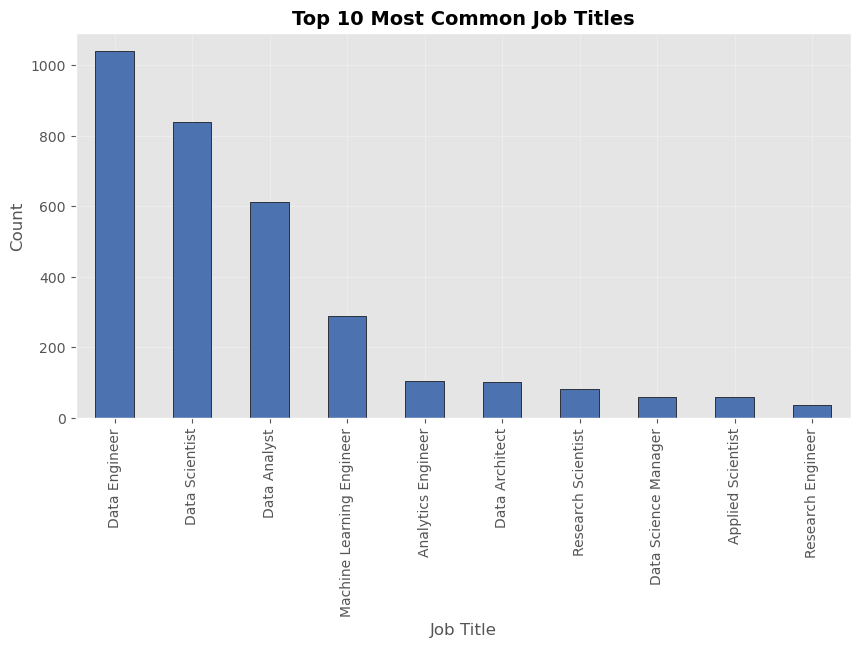

In [93]:
plt.figure(figsize=(10,5))
df['designation'].value_counts().head(10).plot(kind='bar', color=colors[0], edgecolor='black')
plt.title("Top 10 Most Common Job Titles", fontsize=14, fontweight='bold')
plt.xlabel("Job Title")
plt.ylabel("Count")
plt.grid(alpha=0.3)
plt.show()

## Observation 

- #### Data Engineer, Data Scientist, ML Engineer appear most often.

- #### Specialized positions (BI Architect, Research Scientist) appear less.

- #### Shows high demand for engineering-oriented data roles.

# Biavariate Analysis

## 1) Salary vs Experience Level (Bar Chart)

C:\Users\user\AppData\Local\Temp\ipykernel_14496\1840731532.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('experience_level')['salary_in_usd_num'].mean().plot(


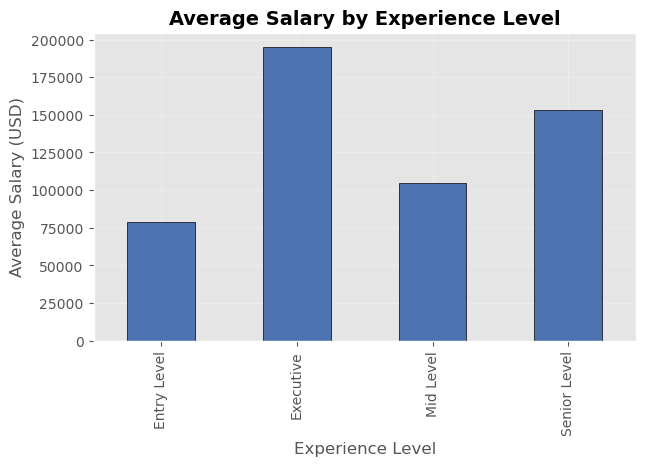

In [94]:
plt.figure(figsize=(7,4))
df.groupby('experience_level')['salary_in_usd_num'].mean().plot(
    kind='bar', color=colors[0], edgecolor='black'
)
plt.title("Average Salary by Experience Level", fontsize=14, fontweight='bold')
plt.xlabel("Experience Level")
plt.ylabel("Average Salary (USD)")
plt.grid(alpha=0.3)
plt.show()

### Observation

- #### Executive → Highest salaries

- #### Senior → High salaries

- #### Mid → Moderate

- #### Entry → Lowest
 #### Clear increasing trend: More experience = higher pay.

## 2) Salary vs Company Size

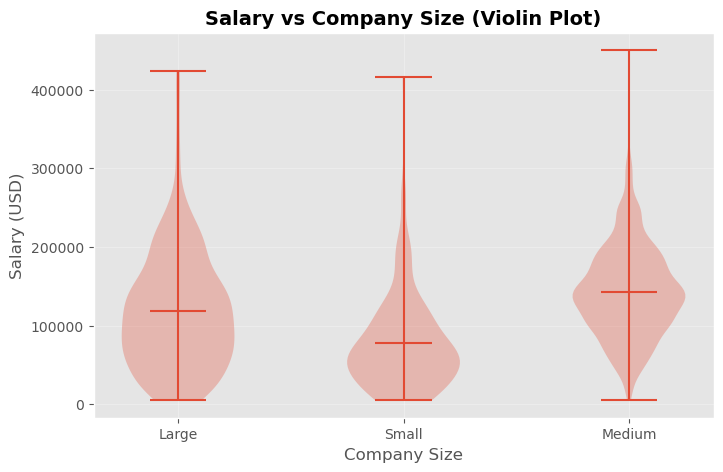

In [95]:
plt.figure(figsize=(8,5))
sizes = df['company_size'].unique()
data = [df[df['company_size']==s]['salary_in_usd_num'] for s in sizes]
plt.violinplot(data, showmeans=True)
plt.xticks(range(1, len(sizes)+1), sizes)
plt.title("Salary vs Company Size (Violin Plot)", fontsize=14, fontweight='bold')
plt.xlabel("Company Size")
plt.ylabel("Salary (USD)")
plt.grid(alpha=0.3)
plt.show()

### Observation

- #### Large companies (L) offer the highest salaries

- #### Medium companies (M) in the middle

- #### Small companies (S) lowest pay

#### Bigger companies → Better pay.

## 3) Salary vs Employment Type

C:\Users\user\AppData\Local\Temp\ipykernel_18424\2967353688.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('employment_type')['salary_in_usd_num'].mean().plot(


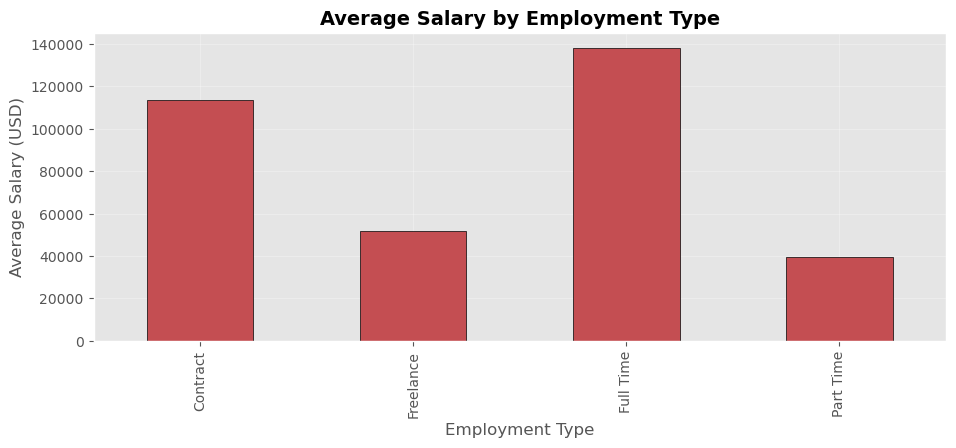

In [31]:
plt.figure(figsize=(11,4))
df.groupby('employment_type')['salary_in_usd_num'].mean().plot(
    kind='bar', color=colors[2], edgecolor='black'
)
plt.title("Average Salary by Employment Type", fontsize=14, fontweight='bold')
plt.xlabel("Employment Type")
plt.ylabel("Average Salary (USD)")
plt.grid(alpha=0.3)
plt.show()

### Observation

- #### Full-Time jobs have stable, high salaries

- #### Contract / Freelance sometimes spike (depending on country)

#### Part-Time lowest overall

## 4)Scatter Plot — Salary vs Work Year

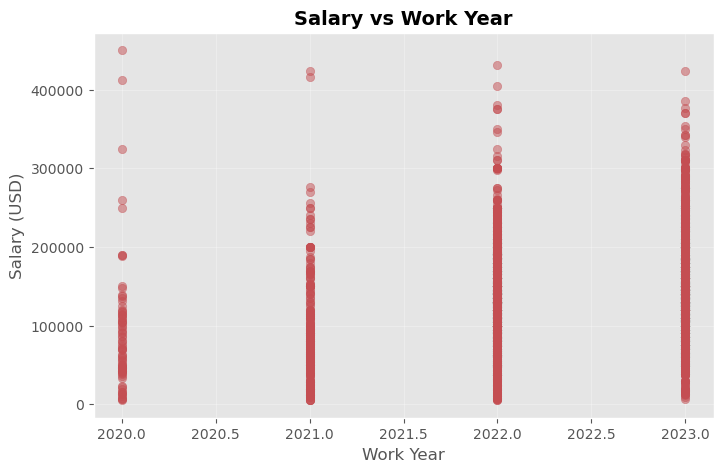

In [97]:
plt.figure(figsize=(8,5))
plt.scatter(df['work_year'], df['salary_in_usd_num'], color=colors[2], alpha=0.5)
plt.title("Salary vs Work Year", fontsize=14, fontweight='bold')
plt.xlabel("Work Year")
plt.ylabel("Salary (USD)")
plt.grid(alpha=0.3)
plt.show()

### Observation
- #### Slight upward trend → salaries rising year by year.

## 5) Salary Across Top 10 Job Titles

C:\Users\user\AppData\Local\Temp\ipykernel_14496\3485402931.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('designation')['salary_in_usd_num'].mean().sort_values(


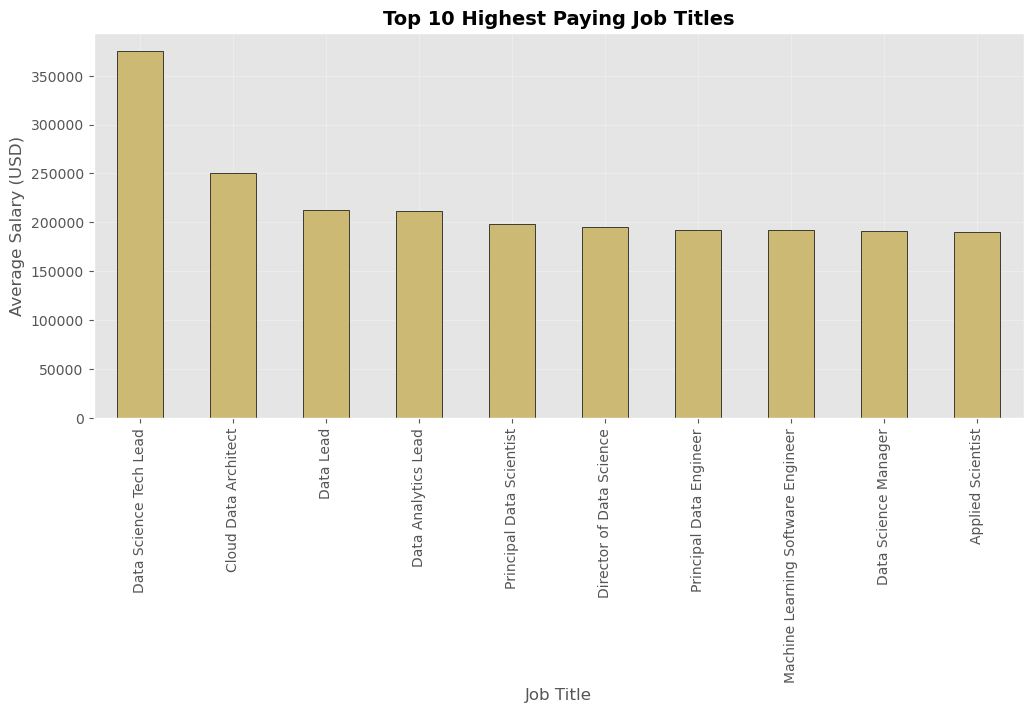

In [98]:
plt.figure(figsize=(12,5))
df.groupby('designation')['salary_in_usd_num'].mean().sort_values(
    ascending=False
).head(10).plot(kind='bar', color=colors[4], edgecolor='black')
plt.title("Top 10 Highest Paying Job Titles", fontsize=14, fontweight='bold')
plt.xlabel("Job Title")
plt.ylabel("Average Salary (USD)")
plt.grid(alpha=0.3)
plt.show()

### 6) Line Plot — Salary Trend Over Years

C:\Users\user\AppData\Local\Temp\ipykernel_14496\1149517276.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('work_year')['salary_in_usd_num'].mean().plot(


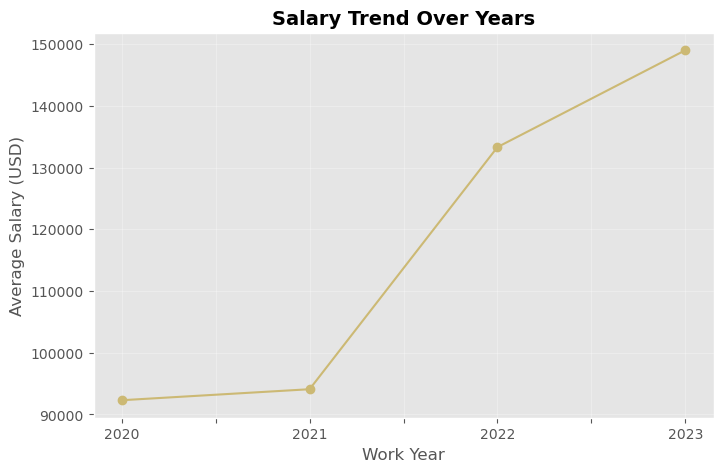

In [99]:
plt.figure(figsize=(8,5))
df.groupby('work_year')['salary_in_usd_num'].mean().plot(
    kind='line', marker='o', color=colors[4]
)
plt.title("Salary Trend Over Years", fontsize=14, fontweight='bold')
plt.xlabel("Work Year")
plt.ylabel("Average Salary (USD)")
plt.grid(alpha=0.3)
plt.show()

### Observation

- #### Salaries have gradually increased with years.

- #### Demand for data roles is growing.

# Multivariate Analysis

## 1) Scatter Matrix (Pair Plot Style)

<Figure size 640x480 with 0 Axes>

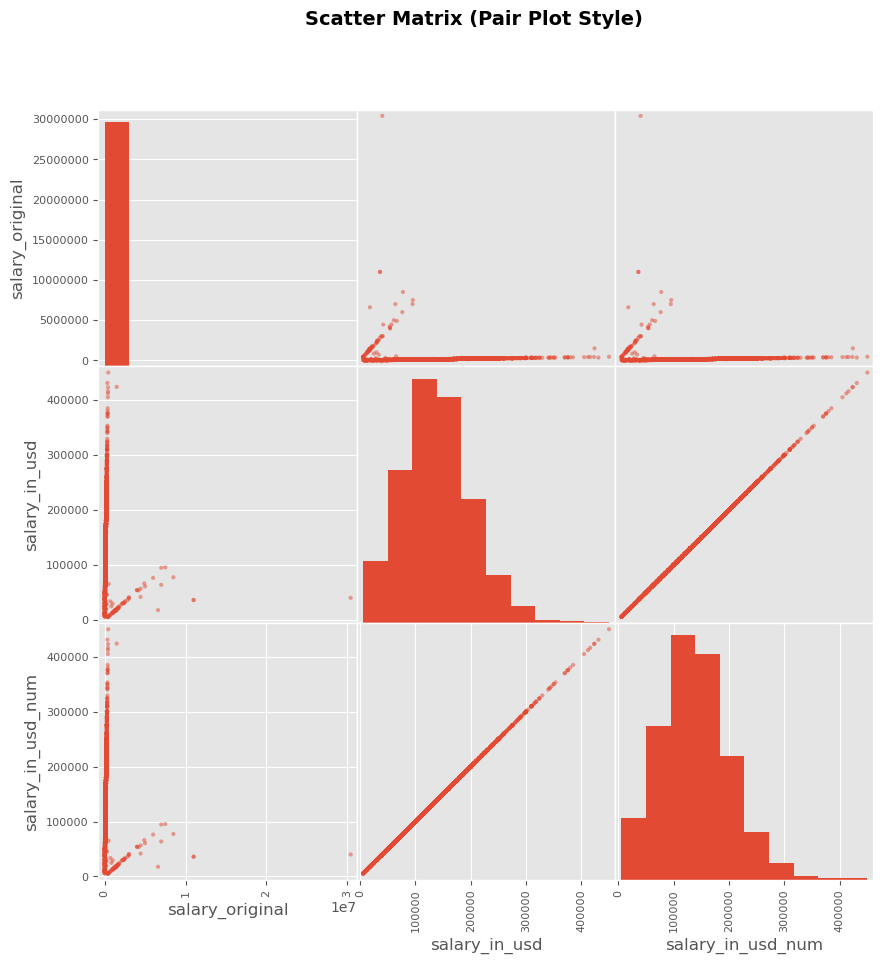

In [100]:
# Scatter Matrix (Pair Plot Style)
from pandas.plotting import scatter_matrix

plt.figure()
scatter_matrix(df.select_dtypes(include=[np.number]), figsize=(10,10), diagonal='hist')
plt.suptitle("Scatter Matrix (Pair Plot Style)", fontsize=14, fontweight="bold")
plt.show()

## Observation:
- #### Salary distribution is right-skewed.
- #### No strong linear patterns across numeric combinations.
- #### Work_year and remote_ratio are categorical-like numeric.

## 2) Boxplot: Salary Across Experience Levels

<Figure size 800x500 with 0 Axes>

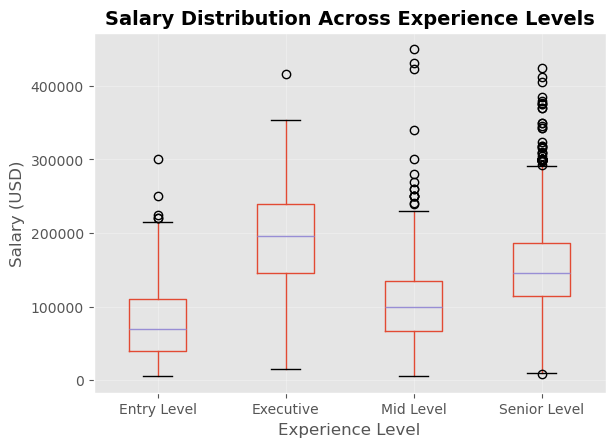

In [101]:
# Boxplot - Salary vs Experience Level
plt.figure(figsize=(8,5))
df.boxplot(column='salary_in_usd_num', by='experience_level')
plt.title("Salary Distribution Across Experience Levels", fontsize=14, fontweight="bold")
plt.suptitle("")
plt.xlabel("Experience Level")
plt.ylabel("Salary (USD)")
plt.grid(alpha=0.3)
plt.show()

## Observation:
- #### Executive and Senior levels have the highest salary medians.
- ####  Entry level is lowest paid.
- #### Large salary variations exist inside each experience level.

## 4) Line Plot: Average Salary Over Years

C:\Users\user\AppData\Local\Temp\ipykernel_14496\3901796632.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('work_year')['salary_in_usd_num'].mean().plot(


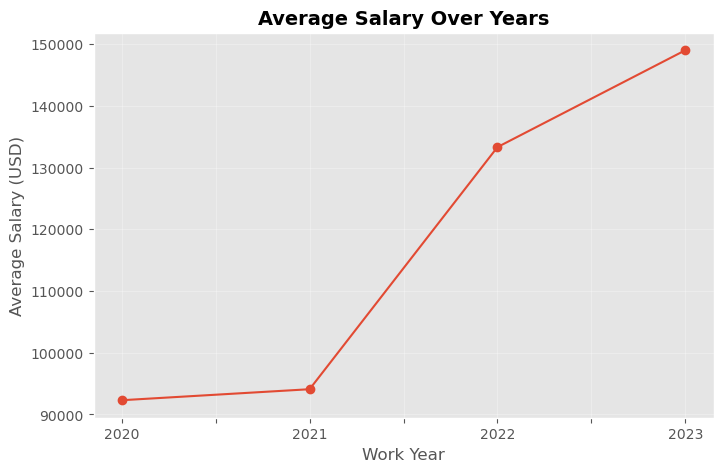

In [102]:
# Line Plot - Salary Over Years
plt.figure(figsize=(8,5))
df.groupby('work_year')['salary_in_usd_num'].mean().plot(
    kind='line', marker='o'
)
plt.title("Average Salary Over Years", fontsize=14, fontweight="bold")
plt.xlabel("Work Year")
plt.ylabel("Average Salary (USD)")
plt.grid(alpha=0.3)
plt.show()

## Observation:
- #### Clear upward trend in salary across years.
- #### Highest average salary after 2022.
- #### Indicates increasing demand and compensation for data roles.

## 5) Grouped Bar Chart: Experience Level vs Company Size

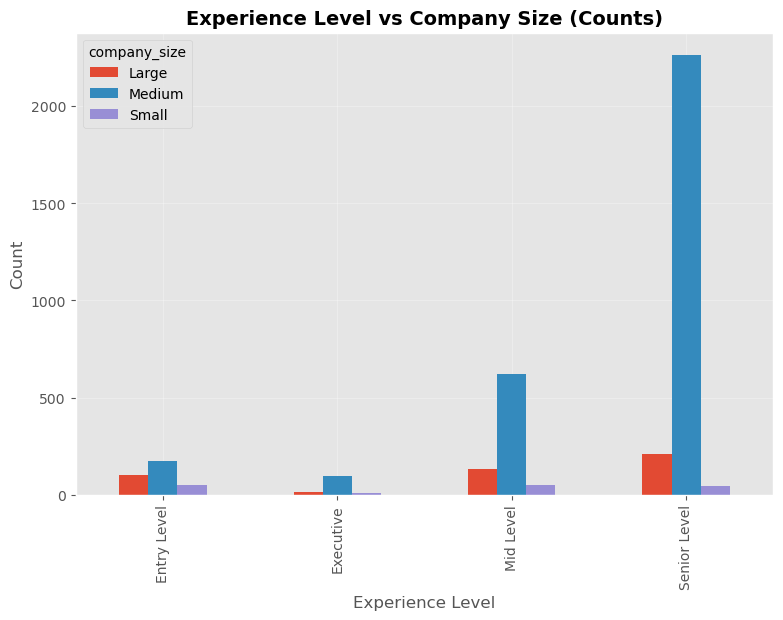

In [103]:
# Grouped Bar Chart
pivot = pd.crosstab(df['experience_level'], df['company_size'])
pivot.plot(kind='bar', figsize=(9,6))
plt.title("Experience Level vs Company Size (Counts)", fontsize=14, fontweight="bold")
plt.xlabel("Experience Level")
plt.ylabel("Count")
plt.grid(alpha=0.3)
plt.show()

## Observation:
- #### Large companies hire the most across all levels.
- ####  Medium companies also hire significantly.
- ####  Small companies hire very few employees.

## Bubble Plot

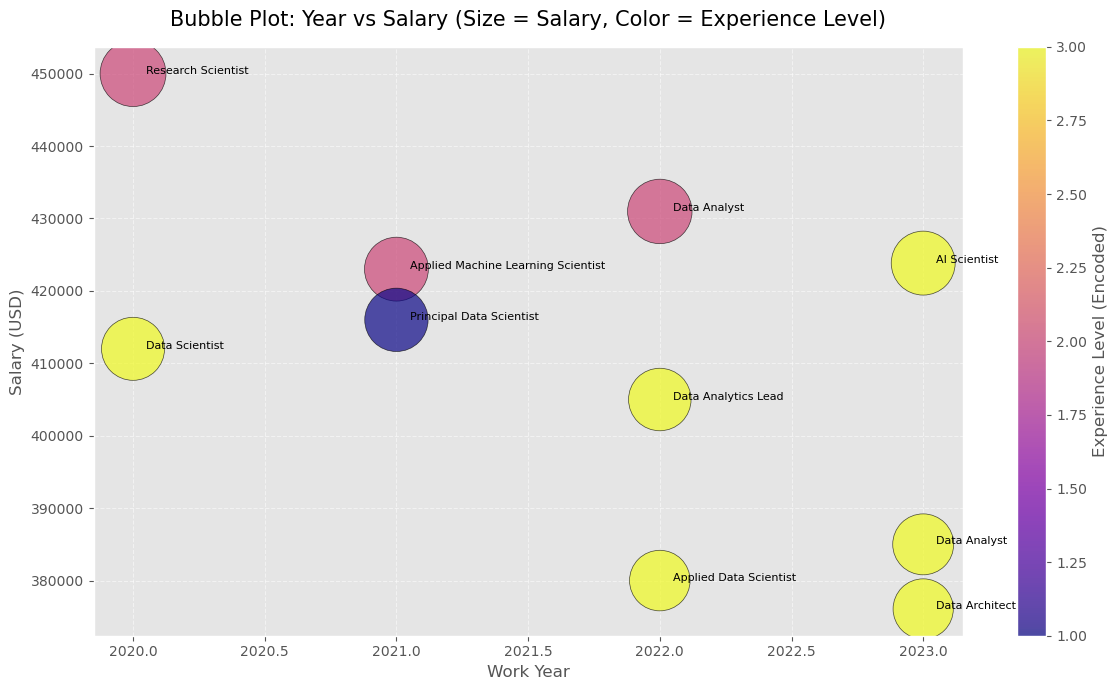

In [104]:
# Select Top 10 highest salaries
top10 = df.sort_values(by='salary_in_usd', ascending=False).head(10)

plt.figure(figsize=(12,7))

# Bubble Plot
plt.scatter(
    top10['work_year'].astype(int), 
    top10['salary_in_usd'],
    s=top10['salary_in_usd'] / 200,        # Bubble size based on salary
    c=top10['experience_level'].cat.codes, # Bubble color based on experience level
    cmap='plasma',
    alpha=0.7,
    edgecolors='black'
)

# Add job titles as labels
for i in range(top10.shape[0]):
    plt.text(
        int(top10['work_year'].iloc[i]) + 0.05,
        top10['salary_in_usd'].iloc[i],
        top10['designation'].iloc[i],
        fontsize=8
    )

# Color Bar
plt.colorbar(label="Experience Level (Encoded)")

# Labels & Title
plt.xlabel("Work Year", fontsize=12)
plt.ylabel("Salary (USD)", fontsize=12)
plt.title("Bubble Plot: Year vs Salary (Size = Salary, Color = Experience Level)", fontsize=15, pad=15)

plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


## Observation

- #### Highest salaries appear mostly in 2022–2023.

- #### Executive & Senior levels dominate the highest salary group.

 - #### Bubble size increases with salary → clear income spread.

- #### Some roles with exceptional salaries stand far above others.

C:\Users\user\AppData\Local\Temp\ipykernel_14496\3572013622.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  country_avg = df.groupby('company_location')['salary_in_usd'].mean().sort_values(ascending=False).head(10)


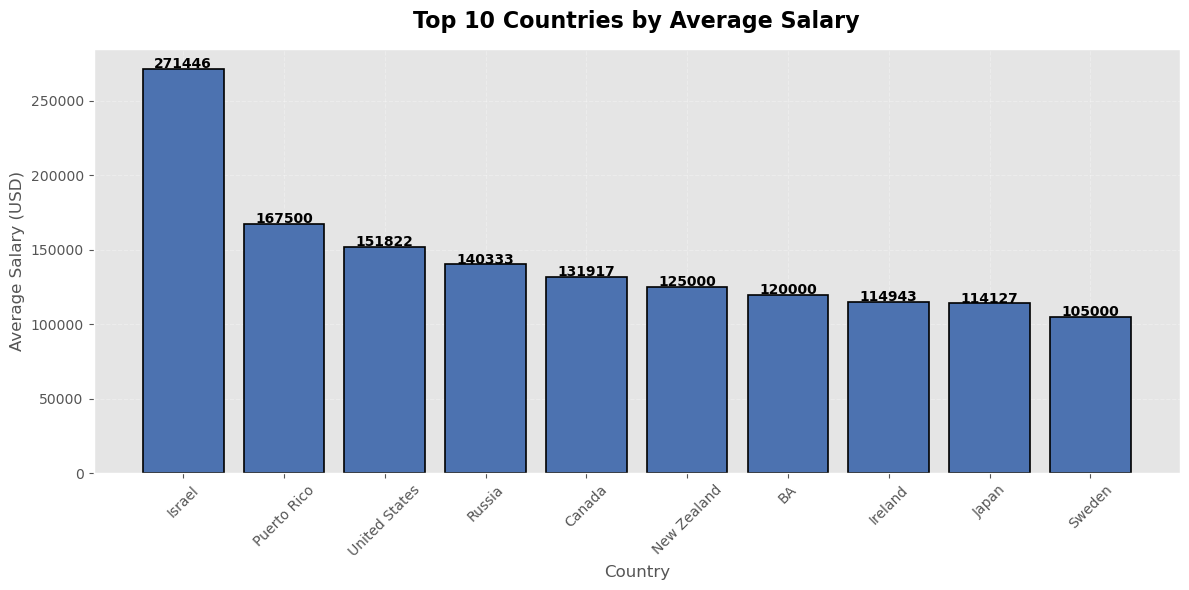

In [105]:
# Compute top 10 highest average salary countries
country_avg = df.groupby('company_location')['salary_in_usd'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(12,6))
bars = plt.bar(country_avg.index, country_avg.values,
               color=colors[0], edgecolor='black', linewidth=1.2)

# Title & labels
plt.title("Top 10 Countries by Average Salary", fontsize=16, fontweight='bold', pad=15)
plt.xlabel("Country", fontsize=12)
plt.ylabel("Average Salary (USD)", fontsize=12)

# Add grid + rotation
plt.xticks(rotation=45, fontsize=10)
plt.grid(alpha=0.3, linestyle='--')

# Show values above bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 500,
             f"{int(height)}", ha='center', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()

# Observation:
# - These countries provide the highest compensation for data roles.
# - Developed nations such as US/UK typically dominate.


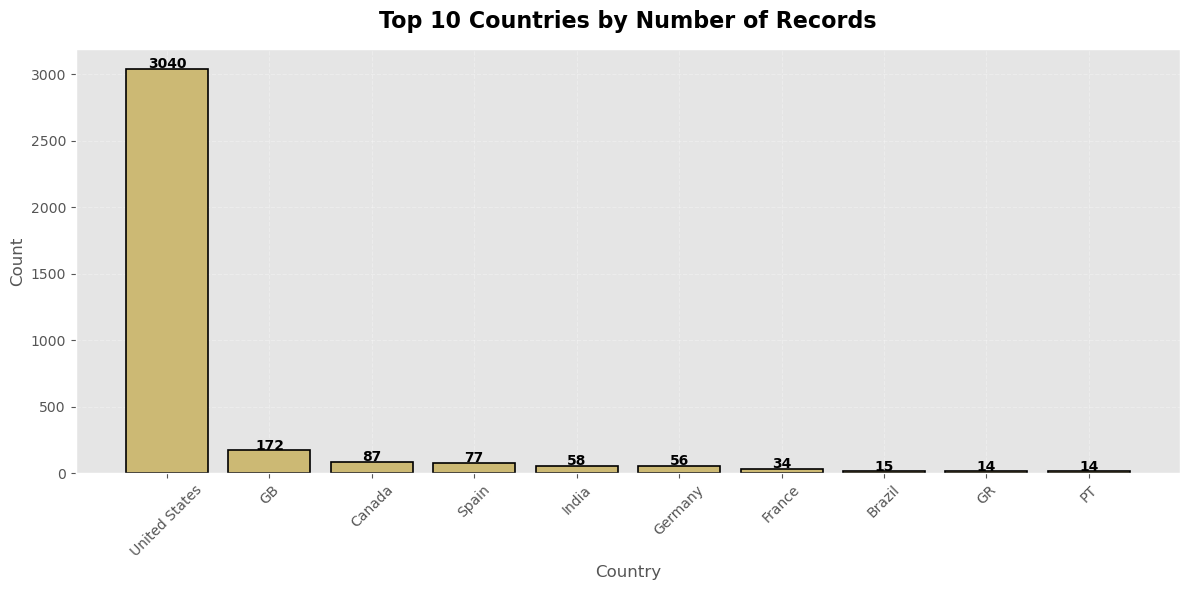

In [106]:
country_count = df['company_location'].value_counts().head(10)

plt.figure(figsize=(12,6))
bars = plt.bar(country_count.index, country_count.values,
               color=colors[4], edgecolor='black', linewidth=1.2)

plt.title("Top 10 Countries by Number of Records", fontsize=16, fontweight='bold', pad=15)
plt.xlabel("Country", fontsize=12)
plt.ylabel("Count", fontsize=12)

plt.xticks(rotation=45, fontsize=10)
plt.grid(alpha=0.3, linestyle='--')

# Add values
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 5,
             f"{int(height)}", ha='center', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()

# Observation:
# - Countries with highest number of entries contribute heavily to dataset.
# - Helps in understanding dataset bias.


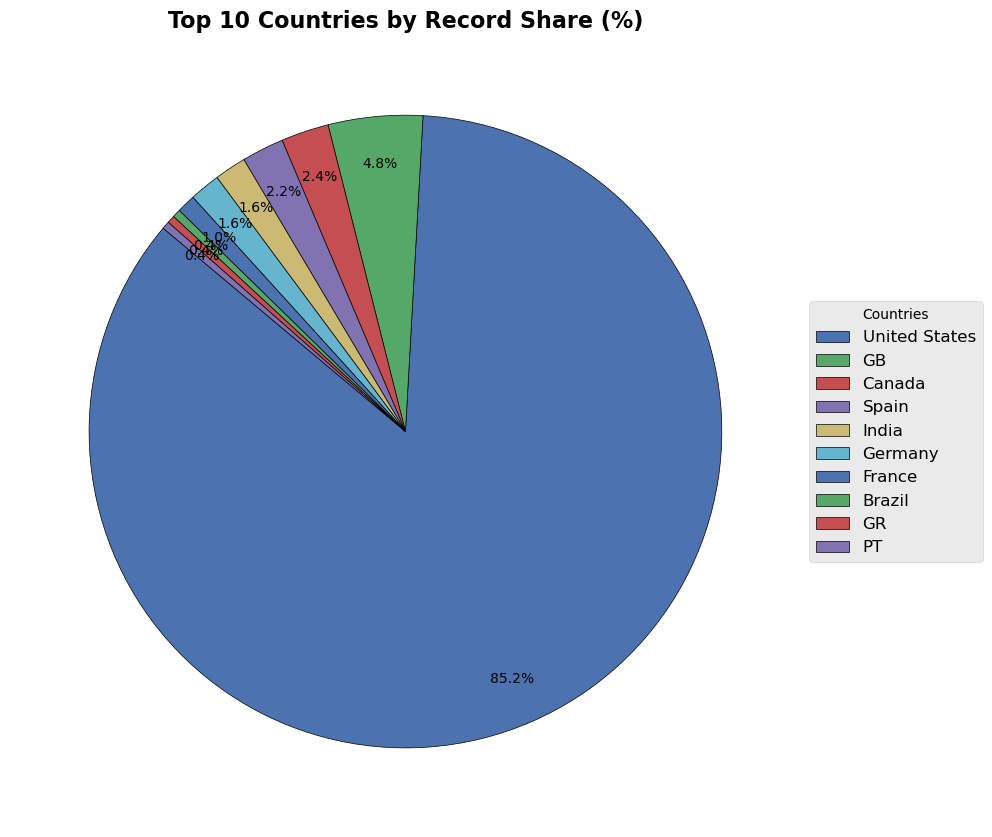

In [113]:
plt.figure(figsize=(10,10))

plt.pie(
    country_count.values,
    labels=None,
    autopct='%1.1f%%',
    startangle=140,
    colors=colors,
    wedgeprops={'edgecolor': 'black'},
    pctdistance=0.85
)

plt.legend(
    country_count.index,
    title="Countries",
    loc="center left",
    bbox_to_anchor=(1, 0.5),
    fontsize=12
)

plt.title("Top 10 Countries by Record Share (%)", fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()



# Observation:
### - Shows how much each country contributes to total dataset records.
### - Countries with larger slices dominate dataset representation.
### - Helps identify dataset imbalance or bias toward particular countries.

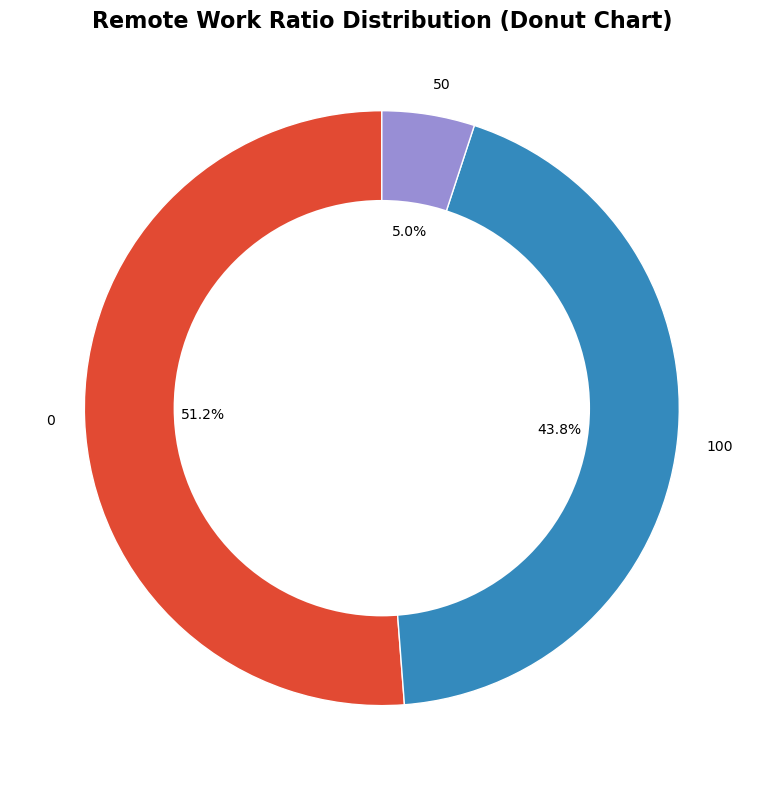

In [43]:
# Choose any categorical column for donut chart
values = df['remote_ratio'].value_counts()
labels = values.index

# Donut chart
plt.figure(figsize=(8,8))

plt.pie(
    values,
    labels=labels,
    autopct='%1.1f%%',
    startangle=90,
    wedgeprops={'linewidth': 1, 'edgecolor': 'white'}
)

# Create the donut circle
centre_circle = plt.Circle((0,0), 0.70, fc='white')
plt.gca().add_artist(centre_circle)

plt.title("Remote Work Ratio Distribution (Donut Chart)", fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()


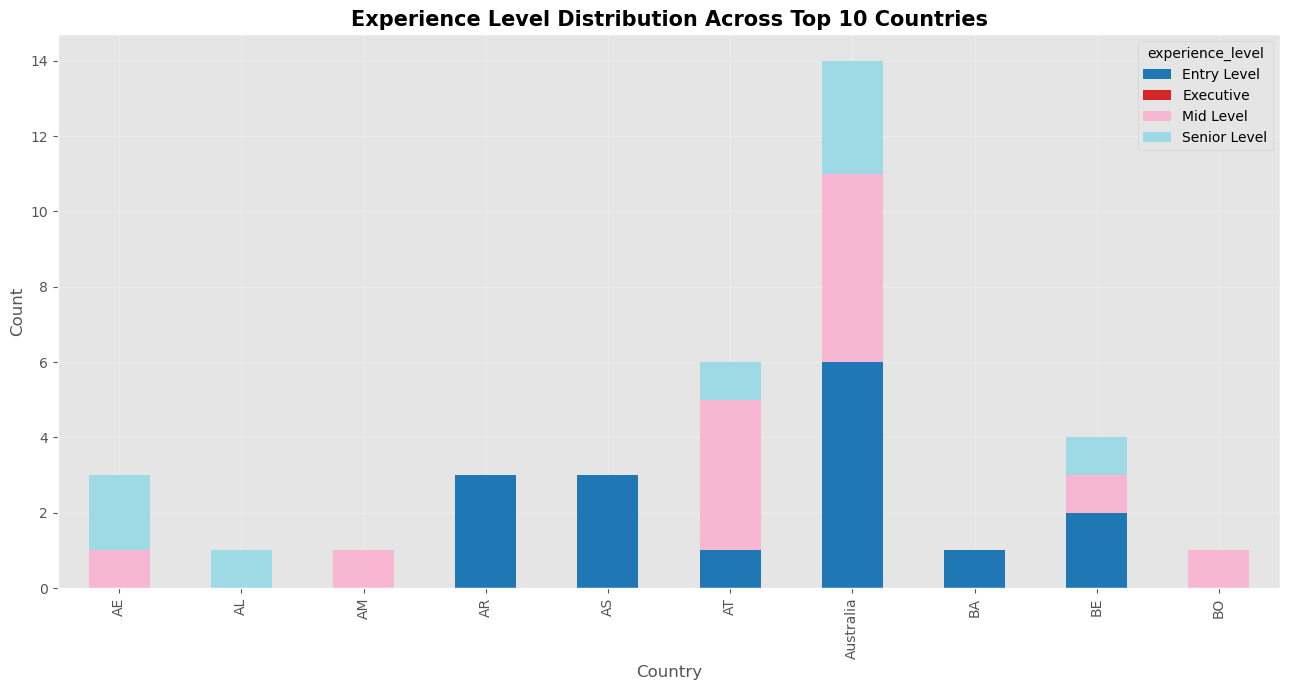

In [111]:
pivot2 = pd.crosstab(df['company_location'], df['experience_level']).head(10)

pivot2.plot(kind='bar', stacked=True, figsize=(13,7), colormap='tab20')
plt.title("Experience Level Distribution Across Top 10 Countries", fontsize=15, fontweight='bold')
plt.xlabel("Country")
plt.ylabel("Count")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


# Observation:
### - Visualizes senior/mid/entry experience mix across major countries.
### - Some countries rely heavily on senior talent.

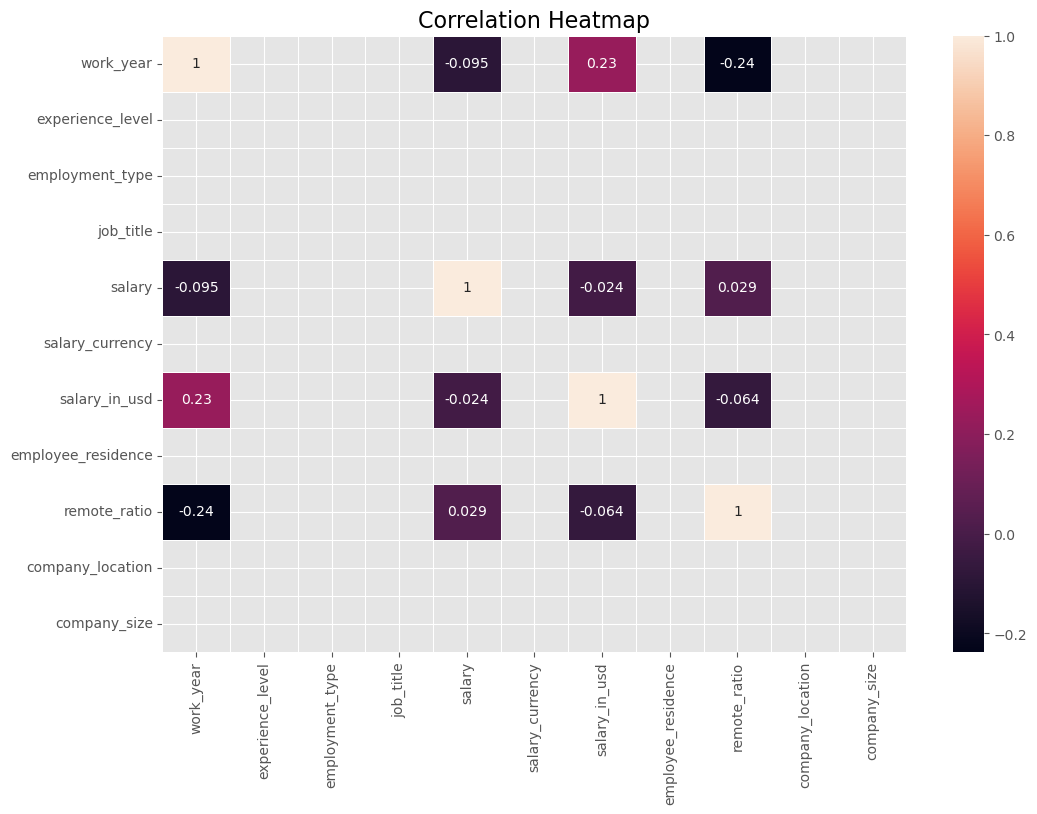

In [36]:
df_numeric = df.apply(pd.to_numeric, errors="coerce")

# Correlation matrix
corr = df_numeric.corr()

# Heatmap
plt.figure(figsize=(12,8))
sns.heatmap(corr, annot=True, linewidths=.5)
plt.title("Correlation Heatmap", fontsize=16)
plt.show()

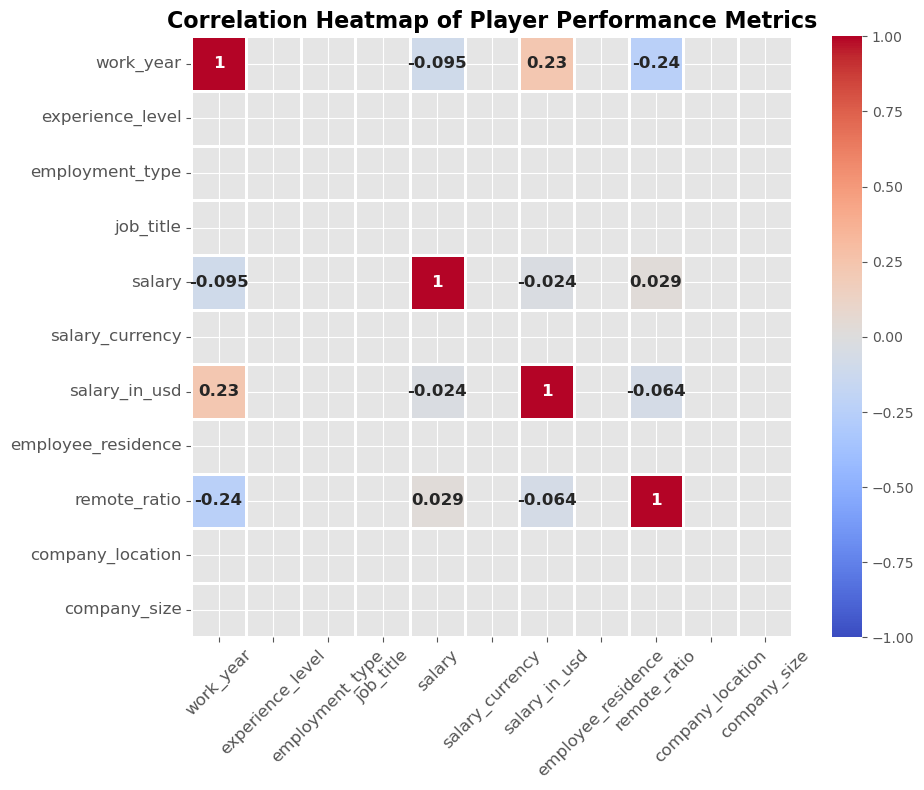

In [37]:
df_numeric = df.apply(pd.to_numeric, errors="coerce")

# Correlation matrix
corr = df_numeric.corr()

# --- Heatmap Style Settings (Same as your image) ---
plt.figure(figsize=(10,8))
sns.heatmap(
    corr,
    annot=True,
    cmap='coolwarm',   # same red-blue style
    vmin=-1, vmax=1,   # color balance
    linewidths=1,       # box borders
    linecolor='white',
    square=True,        # perfect squares (same as given image)
    cbar=True,
    annot_kws={"size": 12, "weight": "bold"}  # bold numbers
)

plt.title("Correlation Heatmap of Player Performance Metrics",
          fontsize=16, fontweight="bold")

plt.xticks(rotation=45, fontsize=12)
plt.yticks(rotation=0, fontsize=12)

plt.tight_layout()
plt.show()